In [56]:
import os
import pandas as pd
import numpy as np

target_data = 'bipedal_extended_incomplete'
environment = 'xbipedal'
partial_data_dir = f'../../datalake/partials/{target_data}/data/{environment}/runstats/stg'
data_dir = '../data'
recovered_data_dir = f'{data_dir}/recovered'

all_stg = sorted(os.listdir(partial_data_dir))

if not os.path.exists(data_dir):
    os.mkdir(data_dir)
    if not os.path.exists(recovered_data_dir):
        os.mkdir(recovered_data_dir)

In [57]:

n_seeds = 10
seeds = []
seeds_stg = {}
for i in range(1, n_seeds+1):
    seed = f's{i}'
    seeds.append(seed)
    seeds_stg[seed] = []

In [58]:
target_seed = 's10'
for stg in all_stg:
    if not stg.startswith(target_seed):
        target_seed = stg.split('_')[0]
    else:
        data = np.load(f"{partial_data_dir}/{stg}", allow_pickle=True)
        seeds_stg[target_seed].append(data)

In [59]:
seeds_data = {}

columns = ['msteps','bestfit','bestgfit','bestsam','avgfit','paramsize']

for seed, partial_data in seeds_stg.items():
    d_t = np.transpose(partial_data)
    data = pd.DataFrame()
    i = 0
    for c in columns:
        data[c] = [float(r) for r in d_t[i][0]]
        i += 1
    data.index = data.msteps
    data = data.sort_index()
    seeds_data[seed] = data
    data.to_csv(f"{recovered_data_dir}/{seed}_run.csv", index=False)

/tmp/ipykernel_3162383/1563716226.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['seed'] = seed
/tmp/ipykernel_3162383/1563716226.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['seed'] = seed
/tmp/ipykernel_3162383/1563716226.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

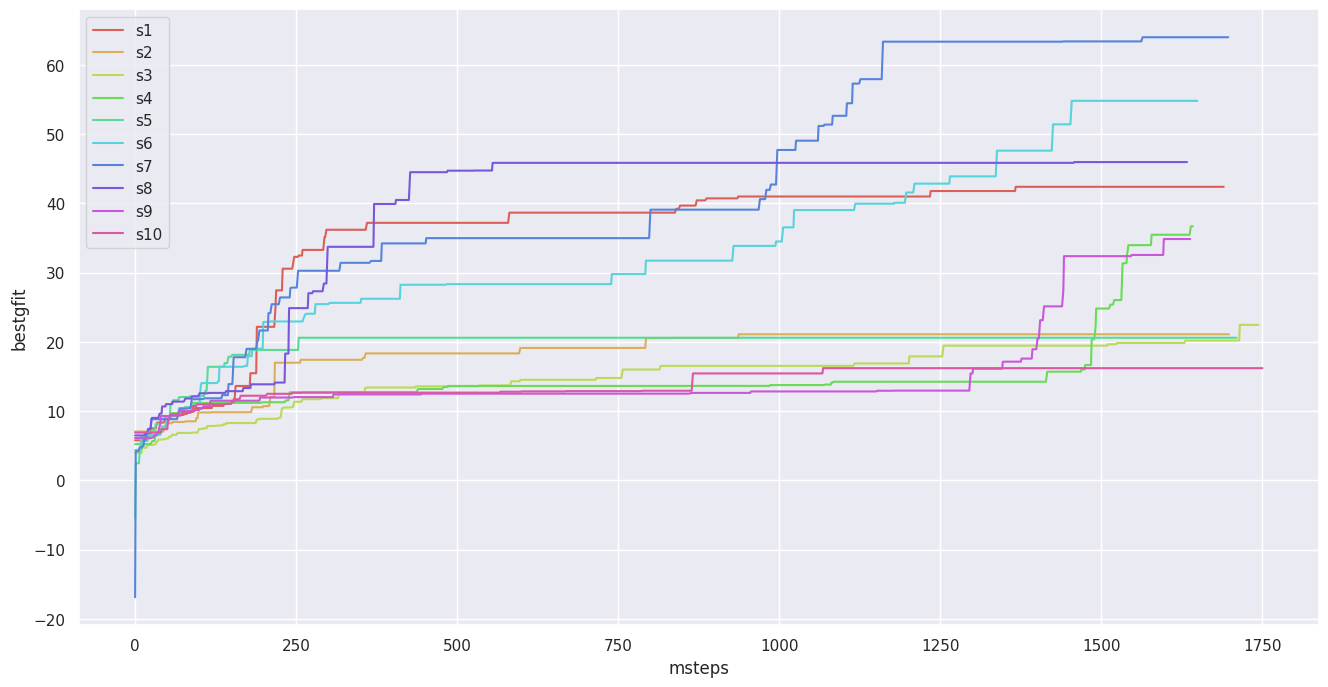

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
sns.set(rc={'figure.figsize':(16,8)})

performance_data = pd.DataFrame()
for seed, data in seeds_data.items():
    df = data[['msteps', 'bestgfit']]
    df['seed'] = seed
    performance_data = pd.concat([performance_data, df])

sns.lineplot(data=performance_data, x='msteps', y='bestgfit', hue='seed', palette='hls')
plt.legend(loc='upper left')
plt.show()